In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import kuaizi as kz
from astropy.table import Table, vstack
import astropy.units as u

from kuaizi.display import display_single
from astropy.io import fits

In [4]:
kz.utils.set_env(project='HSC', name='LSBG', data_dir='/tigress/jiaxuanl/Data/')

'/tigress/jiaxuanl/Data/HSC/LSBG'

In [11]:
from kuaizi.measure import fn

In [7]:
np.random.seed(123)

In [26]:
ref_cat = Table.read('/scratch/gpfs/jiaxuanl/Data/HSC/LSBG/Catalog/LSB-Greco2018.fits')
ref_cat = ref_cat[ref_cat['Reff'] < 3.0]
ref_cat['viz-id'] = np.arange(len(ref_cat))
ref_cat['mag_auto_i'] = ref_cat['imag']
ref_cat['flux_radius_ave_i'] = ref_cat['Reff']
ref_cat.rename_column('RAJ2000', 'ra')
ref_cat['ra'] = ref_cat['ra'].data
ref_cat.rename_column('DEJ2000', 'dec')
ref_cat['dec'] = ref_cat['dec'].data

ref_cat.write('./Catalog/tiny_sample/lsbg_tiny.fits', overwrite=True)

In [18]:
ref_cat = Table.read('/scratch/gpfs/jiaxuanl/Data/HSC/LSBG/Catalog/LSB-Greco2018.fits')
ref_cat = ref_cat[ref_cat['Reff'] > 3.0]
ref_cat = ref_cat[np.random.randint(0, len(ref_cat), 100)]

ref_cat['viz-id'] = np.arange(62, 62 + len(ref_cat))
ref_cat['mag_auto_i'] = ref_cat['imag']
ref_cat['flux_radius_ave_i'] = ref_cat['Reff']
ref_cat.rename_column('RAJ2000', 'ra')
ref_cat['ra'] = ref_cat['ra'].data
ref_cat.rename_column('DEJ2000', 'dec')
ref_cat['dec'] = ref_cat['dec'].data

ref_cat.write('./Catalog/tiny_sample/lsbg_tiny_2.fits', overwrite=True)

In [16]:
from kuaizi.measure import fn

In [21]:
ref_cat['SB_eff_avg_i'] = ref_cat['iSB'] + 2.5 * np.log10(fn(ref_cat['n']))
ref_cat['SB_eff_avg_g'] = ref_cat['SB_eff_avg_i'] + ref_cat['g-i']

(28.0, 24.0)

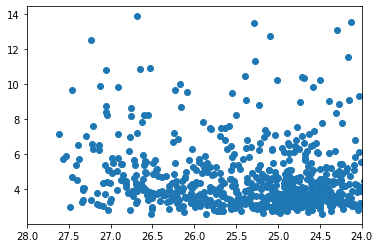

In [25]:
plt.scatter(ref_cat['SB_eff_avg_g'], ref_cat['Reff'])
plt.xlim(28, 24)

In [23]:
ref_cat

UV,Seq,RAJ2000,DEJ2000,iSB,e_iSB,imag,e_imag,g-r,g-i,Reff,e_Reff,n,e_n,Ell,e_Ell,Ag,Ar,Ai,recno,SB_eff_avg_i,SB_eff_avg_g
,,deg,deg,mag / arcsec2,mag / arcsec2,mag,mag,mag,mag,arcsec,arcsec,,,,,mag,mag,mag,,mag / arcsec2,mag / arcsec2
bytes1,int16,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int32,float64,float64
,1,247.28273,43.67173,25.88,0.4,21.03,0.25,0.92,1.29,7.15,0.84,0.57,0.32,0.59,0.04,0.022,0.015,0.011,1,26.330358245717935,27.620358245717934
,2,245.71466,43.72621,25.38,0.4,20.56,0.24,0.66,0.88,5.92,0.79,0.45,0.31,0.49,0.03,0.042,0.029,0.021,2,25.737326459247054,26.617326459247053
,3,241.37654,44.3357,24.85,0.4,21.01,0.24,0.6,0.81,4.05,0.79,0.61,0.31,0.47,0.03,0.037,0.026,0.019,3,25.328430253725664,26.138430253725662
,4,240.9165,43.98957,24.67,0.4,21.04,0.24,0.46,0.71,3.37,0.79,0.85,0.32,0.11,0.04,0.035,0.025,0.018,4,25.293146584742797,26.003146584742797
*,5,240.88005,44.10985,21.87,0.4,19.31,0.24,0.25,0.33,4.88,0.79,1.75,0.31,0.3,0.03,0.033,0.023,0.016,5,22.838723252623836,23.168723252623835
,6,244.48318,44.2905,22.71,0.4,19.31,0.24,0.25,0.43,4.12,0.79,1.11,0.31,0.27,0.03,0.037,0.026,0.019,6,23.456866013756215,23.886866013756215
,7,241.51961,44.69582,25.52,0.42,21.8,0.28,0.48,0.56,4.1,0.87,0.73,0.34,0.45,0.06,0.041,0.029,0.021,7,26.075347536596915,26.635347536596914
,8,242.29613,44.35883,23.81,0.4,20.03,0.24,0.27,0.43,4.83,0.79,0.95,0.31,0.42,0.03,0.037,0.026,0.019,8,24.484021345359515,24.914021345359515


(array([ 3.,  3., 12., 15.,  7.,  8.,  6.,  4.,  3.,  1.]),
 array([19.29 , 19.609, 19.928, 20.247, 20.566, 20.885, 21.204, 21.523,
        21.842, 22.161, 22.48 ]),
 <BarContainer object of 10 artists>)

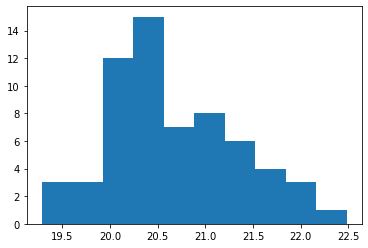

In [12]:
plt.hist(ref_cat['imag'])

In [18]:
# ## Adaptive cutout size??  
# # Normal objects, use 1.0 arcmin cutout.
# # Radius > 20 arcsec, use 1.5 arcmin cutout.
# # Radius > 30 arcsec, use 2.0 arcmin cutout.
# size = np.ones(len(cat)) * 1.0 * u.arcmin

# size[cat['flux_radius_ave_i'] > 20] = 1.5 * u.arcmin # shoud be larger
# size[cat['flux_radius_ave_i'] > 30] = 2 * u.arcmin # should be larger 

# cat['cutout_size'] = size.value
# #cat.write('./Catalog/NSA/nsa_20hosts_sample_211103.fits', overwrite=True)

### Generate cutout

Run `'/home/jiaxuanl/Research/Packages/kuaizi/diezi/gen_cutout/nsa_sample/lsbg_cutout_nsa.sh'`

In the end, we get `$gpfs/Data/HSC/LSBG/Cutout/nsa_20hosts_cutout_cat.fits`